Q1. Dataset Link :-
https://drive.google.com/file/d/1xw_jMfucVQ1lUsYZ16e8xz85Wu31rGAB/view
1. What are the avg Prices of Airlines ?
2. Total Number of flights from cities ?
3. Avg Duration of flights between source to destination
4. Number of flights in week days ?
5. Does avg Ticket Price varying with weekdays


In [5]:
import pandas as pd
import re

# Load the dataset
url = 'https://drive.google.com/uc?id=1xw_jMfucVQ1lUsYZ16e8xz85Wu31rGAB'
data = pd.read_csv(url)

# Function to convert duration from string to minutes
def convert_duration(duration):
    hours = 0
    minutes = 0

    hour_match = re.search(r'(\d+)h', duration)
    minute_match = re.search(r'(\d+)m', duration)

    if hour_match:
        hours = int(hour_match.group(1))
    if minute_match:
        minutes = int(minute_match.group(1))


    return hours * 60 + minutes

data['Duration_in_minutes'] = data['Duration'].apply(convert_duration)

# 1. Average Prices of Airlines
avg_prices = data.groupby('Airline')['Price'].mean().reset_index()
print("\nAverage Prices of Airlines:")
print(avg_prices)

# 2. Total Number of Flights from Cities
total_flights_from_cities = data['Source'].value_counts().reset_index()
total_flights_from_cities.columns = ['City', 'Total Flights']
print("\nTotal Number of Flights from Cities:")
print(total_flights_from_cities)

# 3. Average Duration of Flights Between Source to Destination
avg_duration = data.groupby(['Source', 'Destination'])['Duration_in_minutes'].mean().reset_index()
avg_duration.columns = ['Source', 'Destination', 'Average Duration (minutes)']
print("\nAverage Duration of Flights Between Source and Destination:")
print(avg_duration)

# 4. Number of Flights on Weekdays
data['Weekday'] = pd.to_datetime(data['Date_of_Journey']).dt.day_name()
flights_per_weekday = data['Weekday'].value_counts().reset_index()
flights_per_weekday.columns = ['Weekday', 'Number of Flights']
print("\nNumber of Flights on Weekdays:")
print(flights_per_weekday)

# 5. Does Average Ticket Price Vary with Weekdays?
avg_price_weekdays = data.groupby('Weekday')['Price'].mean().reset_index()
print("\nAverage Ticket Price by Weekdays:")
print(avg_price_weekdays)


Average Prices of Airlines:
                              Airline         Price
0                            Air Asia   5590.260188
1                           Air India   9611.210616
2                               GoAir   5861.056701
3                              IndiGo   5673.682903
4                         Jet Airways  11643.923357
5                Jet Airways Business  58358.666667
6                   Multiple carriers  10902.678094
7   Multiple carriers Premium economy  11418.846154
8                            SpiceJet   4338.284841
9                              Trujet   4140.000000
10                            Vistara   7796.348643
11            Vistara Premium economy   8962.333333

Total Number of Flights from Cities:
       City  Total Flights
0     Delhi           4537
1   Kolkata           2871
2  Banglore           2197
3    Mumbai            697
4   Chennai            381

Average Duration of Flights Between Source and Destination:
     Source Destination  Average D

<ipython-input-5-cd2a2453dbc5>:44: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Weekday'] = pd.to_datetime(data['Date_of_Journey']).dt.day_name()


Q.2. Dataset Link
https://drive.google.com/drive/folders/1hLkL5HO4xG9rIjL8XeS6quAjwbTDSX6?usp=sharing
1. Numbers of Birds strikes with year and weekdays
2. In Which phase strikes have happened more ?
3. Flights year basis Damage Costings ?
4. Altitude of flights and size of birds at the time of strike (Use subplots)

Number of strikes by year:
 Year
2000.0    1367
2001.0    1230
2002.0    1681
2003.0    1568
2004.0    1692
2005.0    1853
2006.0    2159
2007.0    2301
2008.0    2258
2009.0    3247
2010.0    3121
2011.0    2952
dtype: int64

Number of strikes by weekday:
 Weekday
Friday       3735
Monday       3708
Saturday     3146
Sunday       3505
Thursday     3871
Tuesday      3762
Wednesday    3702
dtype: int64

Most frequent phase of flight during strikes:
 When: Phase of flight
Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Taxi               74
Parked             10
Name: count, dtype: int64

Damage cost per year:
 Year
2000.0     5625496
2001.0    23252168
2002.0     9046405
2003.0    13176787
2004.0     8116866
2005.0     7026670
2006.0    18309903
2007.0    10822426
2008.0    11966121
2009.0     9564327
2010.0    11459879
2011.0    13180130
Name: Cost: Total $, dtype: int64


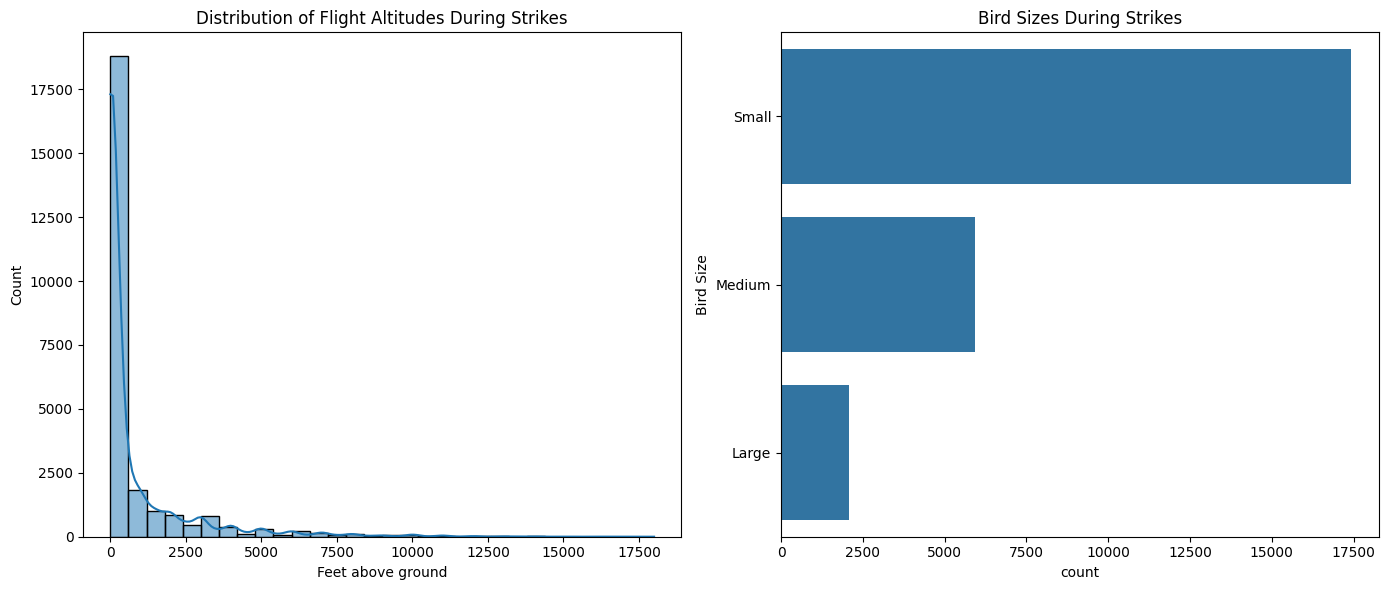

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('Bird Strikes_Final.xlsx')
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
df['Year'] = df['FlightDate'].dt.year
df['Weekday'] = df['FlightDate'].dt.day_name()

# Q1: Number of bird strikes by year and weekday
strikes_per_year = df.groupby('Year').size()
strikes_per_weekday = df.groupby('Weekday').size()
print("Number of strikes by year:\n", strikes_per_year)
print("\nNumber of strikes by weekday:\n", strikes_per_weekday)

# Q2: In which phase of flight bird strikes occurred more
phase_of_flight_strikes = df['When: Phase of flight'].value_counts()
print("\nMost frequent phase of flight during strikes:\n", phase_of_flight_strikes)

# Q3: Flight damage cost on year basis
damage_cost_per_year = df.groupby('Year')['Cost: Total $'].sum()
print("\nDamage cost per year:\n", damage_cost_per_year)

# Q4: Altitude of flights and size of birds at the time of strike (Use subplots)

#  1: Distribution of flight altitudes during strikes
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Feet above ground'].dropna(), bins=30, kde=True)
plt.title('Distribution of Flight Altitudes During Strikes')
plt.xlabel('Feet above ground')

#  2: Distribution of bird sizes during strikes
plt.subplot(1, 2, 2)
sns.countplot(y='Wildlife: Size', data=df, order=df['Wildlife: Size'].value_counts().index)
plt.title('Bird Sizes During Strikes')
plt.ylabel('Bird Size')

plt.tight_layout()
plt.show()
